In [117]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import optimize
from scipy import stats
from scipy import fft
from scipy.signal import butter, filtfilt
plt.style.use(r"/home/vladimir/BOTAY!/Labs/jupyter_template/style.mplstyle")

In [118]:


fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)  

f_signal = 10 
f_local = 30
phi_freq = 0.5


random_phase = np.random.rand(fs)
phi = np.sin(2 * np.pi * t * phi_freq)
signal = np.sin(2 * np.pi * f_signal * t +  phi * 2 * np.pi + random_phase * 0.1)


local_oscillator = np.sin(2 * np.pi * f_local * t + random_phase * 0.1)


mixed_signal = (signal + local_oscillator) ** 2  


spectrum = np.fft.fft(mixed_signal)
freqs = np.fft.fftfreq(len(spectrum), 1/fs)




mixed_signal = (signal + local_oscillator) ** 2



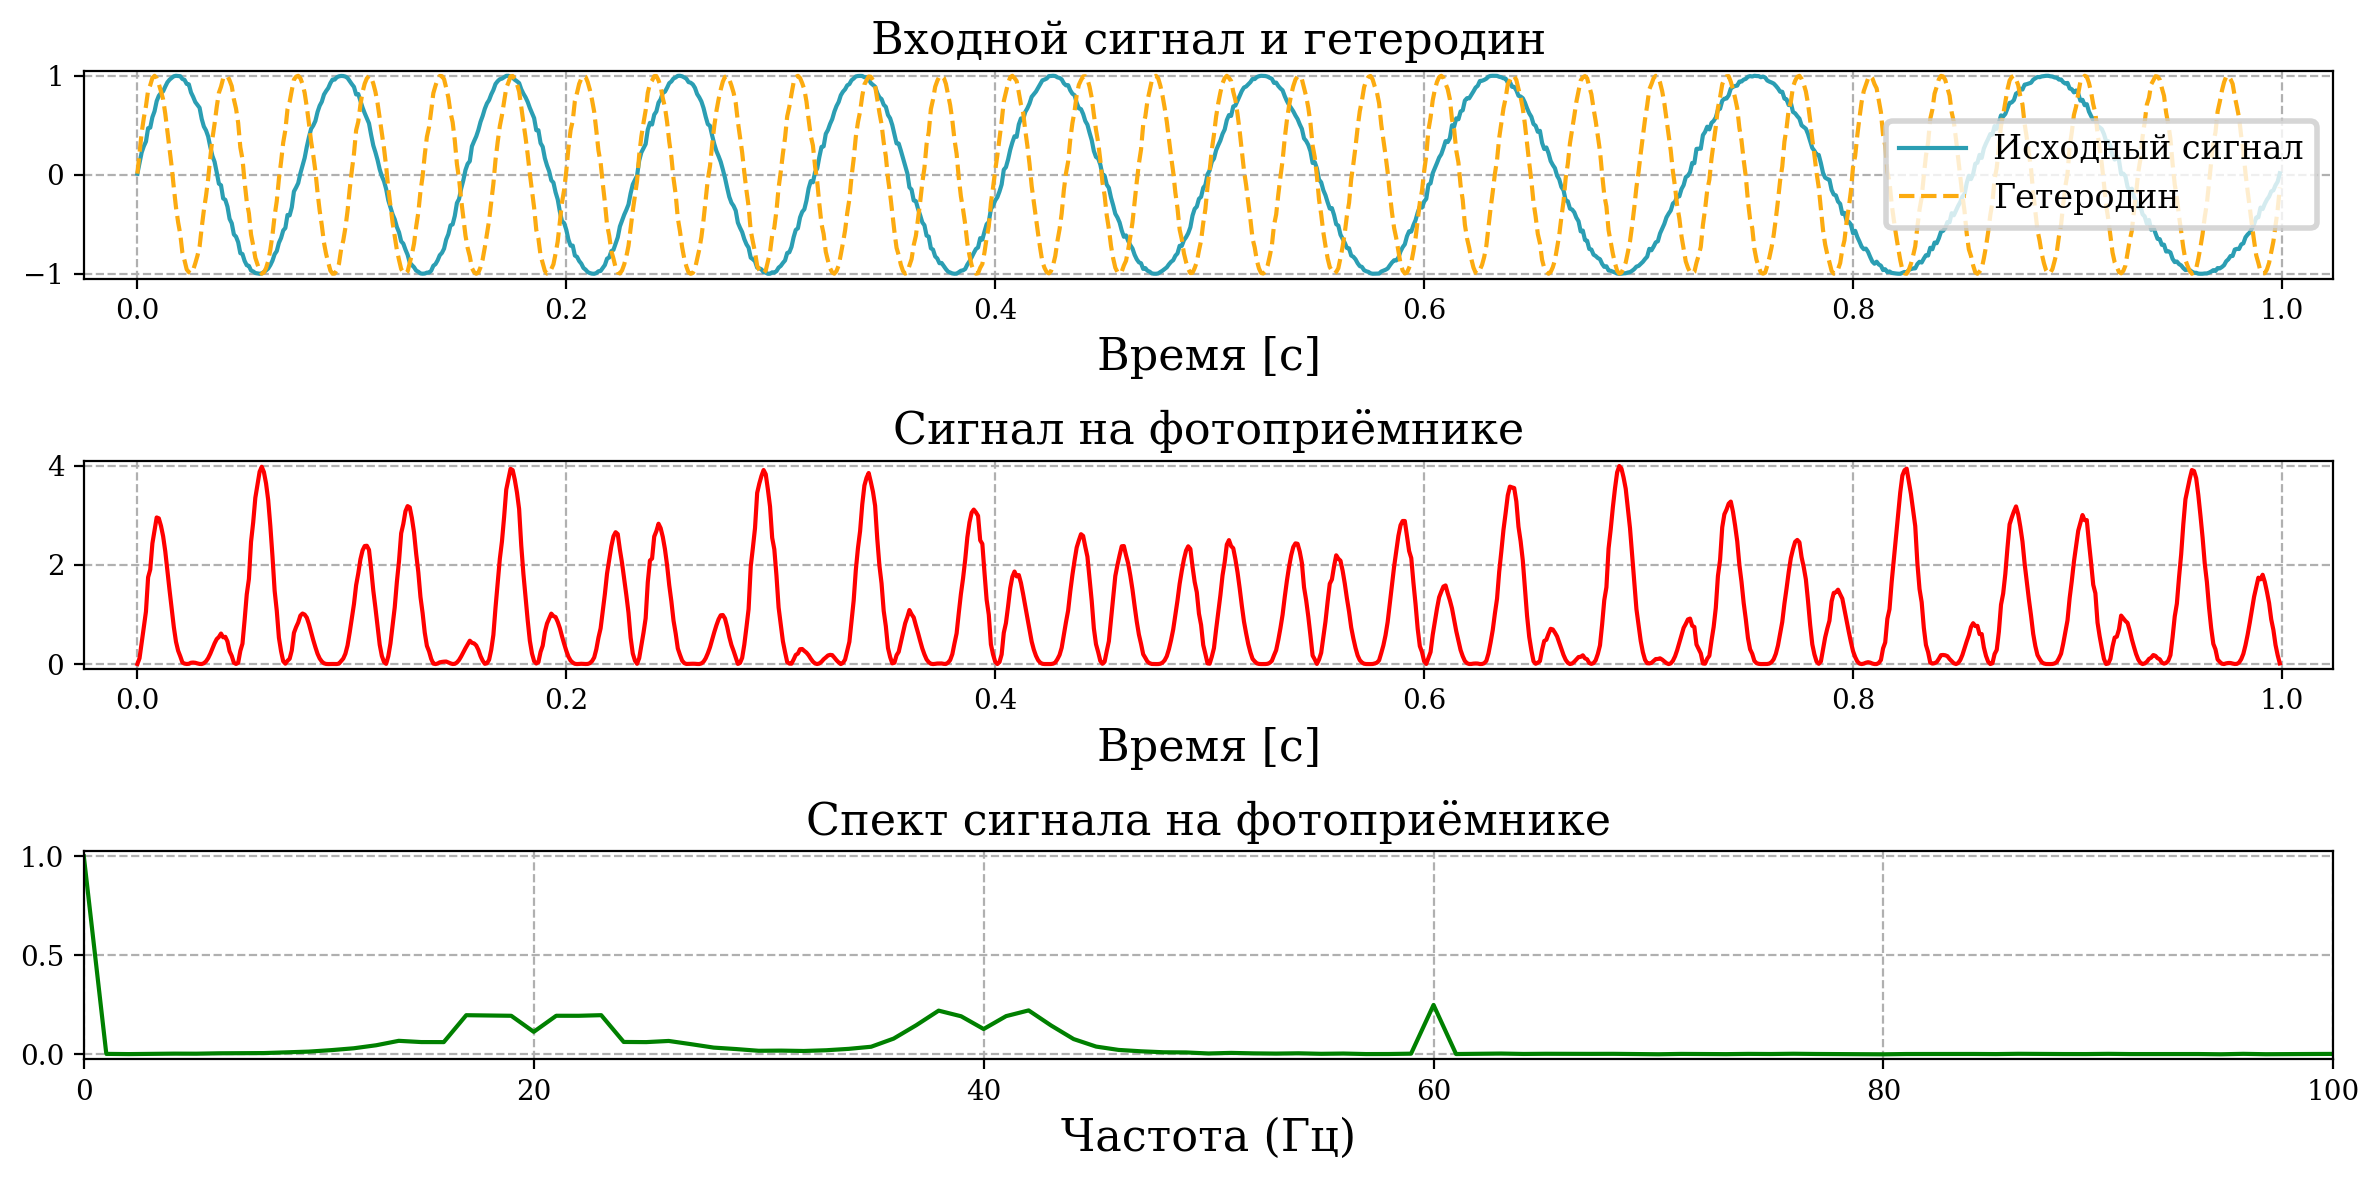

In [119]:

plt.figure(figsize=(12, 6))


plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, local_oscillator, label='Гетеродин', linestyle='dashed')
plt.legend()
plt.xlabel("Время [с]")
plt.title('Входной сигнал и гетеродин')


plt.subplot(3, 1, 2)
plt.plot(t, mixed_signal, color='r')
plt.xlabel("Время [с]")
plt.title('Сигнал на фотоприёмнике')


plt.subplot(3, 1, 3)
plt.plot(freqs[:fs//2], np.abs(spectrum[:fs//2]) / np.max(np.abs(spectrum[:fs//2])), label='Спектр', color='g')
plt.xlim(0, 100)
plt.title('Спект сигнала на фотоприёмнике')
plt.xlabel('Частота (Гц)')
plt.tight_layout()
plt.show()